In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv
/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/test.csv")

In [3]:
train.head()


,timestamp,average_fare,rides_completed,driver_availability,surge_multiplier,vehicle_type,weather,traffic_index,special_event
0,2021-01-01 00:00:00,20.780423,457,49.170948,1.0,bike,Clear,63,0
1,2021-01-01 00:00:00,90.000000,80,30.000000,1.0,car,Clear,53,0
2,2021-01-01 00:00:00,41.197085,239,39.110219,1.0,auto,Clear,35,0
3,2021-01-01 01:00:00,20.772227,141,30.000000,1.5,bike,Stormy,83,0
4,2021-01-01 01:00:00,90.969805,98,30.000000,1.0,car,Clear,26,0


In [4]:
print(len(train))
print(len(test))

63015
15756


### Task 1: Data Exploration and Preparation (1 mark)

- Conduct exploratory data analysis to identify trends, patterns, and anomalies in fare data for each vehicle type (bikes, autos, and cars) in Quahog City.
- Using appropriate visualizations and techniques, provide an in-depth analysis on the nature of the average fare and other features in the dataset.

In [5]:
# Your code along with reasoning
train['timestamp'] = pd.to_datetime(train['timestamp'])

# Check for missing values
missing_values = train.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 timestamp              0
average_fare           0
rides_completed        0
driver_availability    0
surge_multiplier       0
vehicle_type           0
weather                0
traffic_index          0
special_event          0
dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data cleaning
train.drop_duplicates(inplace=True)

                count        mean        std   min         25%         50%  \
vehicle_type                                                                 
auto          21005.0   41.314517   1.915105  40.0   40.000000   40.010248   
bike          21005.0   47.293100  16.840520  20.0   32.992535   46.914986   
car           21005.0  121.951152  18.654883  90.0  106.083041  120.695550   

                     75%         max  
vehicle_type                          
auto           42.229987   53.282087  
bike           62.380387   84.124806  
car           137.757531  161.963018  
  vehicle_type        Mean      Median  Standard Deviation   Min         Max
0         auto   41.314517   40.010248            1.915105  40.0   53.282087
1         bike   47.293100   46.914986           16.840520  20.0   84.124806
2          car  121.951152  120.695550           18.654883  90.0  161.963018


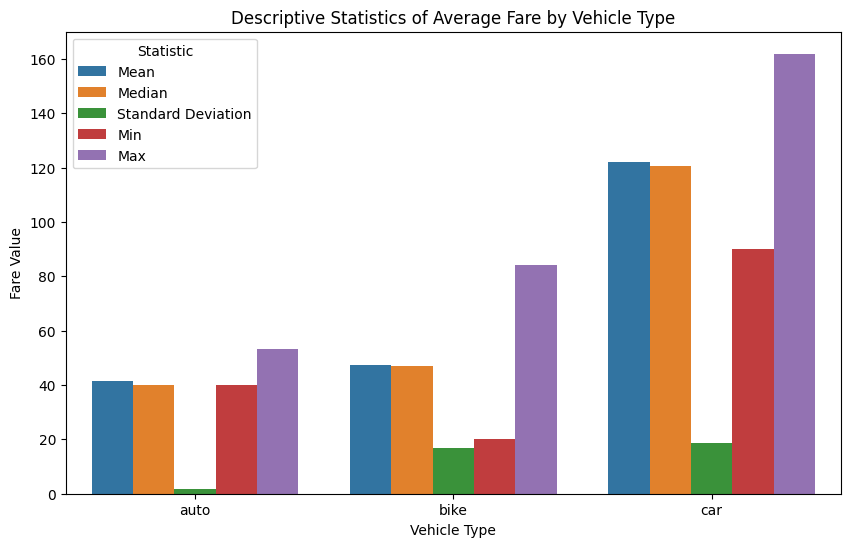

In [7]:
# Descriptive statistics for average_fare by vehicle_type
fare_stats = train.groupby('vehicle_type')['average_fare'].describe()
print(fare_stats)

# Extracting mean, median, standard deviation, min, and max for each vehicle type
fare_mean = train.groupby('vehicle_type')['average_fare'].mean()
fare_median = train.groupby('vehicle_type')['average_fare'].median()
fare_std = train.groupby('vehicle_type')['average_fare'].std()
fare_min = train.groupby('vehicle_type')['average_fare'].min()
fare_max = train.groupby('vehicle_type')['average_fare'].max()

# Creating a DataFrame for visualization
fare_summary = pd.DataFrame({
    'Mean': fare_mean,
    'Median': fare_median,
    'Standard Deviation': fare_std,
    'Min': fare_min,
    'Max': fare_max
}).reset_index()

print(fare_summary)

# Plotting the descriptive statistics
fare_summary_melted = fare_summary.melt(id_vars='vehicle_type', var_name='Statistic', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=fare_summary_melted, x='vehicle_type', y='Value', hue='Statistic')
plt.title('Descriptive Statistics of Average Fare by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fare Value')
plt.legend(title='Statistic')
plt.show()

## Inferences on the descriptive statistics:

### 1. Mean and Median:

The data is fairly symmetrical since the mean and median values are pretty close for each type without extreme skewness.
Cars: highest mean and median fare => the most expensive option on an average.
Bikes: moderately priced
Autos: lowest mean and median fares => most economical option.

### 2. Standard Deviation:

The  of fares is highest for
Cars: highest standard deviation => more variability in the fare values compared to the other 2 types.
Bikes: considerable standard deviation
Autos: lowest variability => Auto fares are more consistent.

### 3. Minimum and Maximum Fares:

Min fare: for Autos is around 40, whereas Bikes and Cars have lower minimum fares at 20 and 90, respectively.
Max fare: significantly higher for Cars (around 162), while Bikes reach a max of 84 and Autos 53, suggesting that while Cars can get quite expensive, Autos remain to be an economical transport option.

### 4. Fare Variability:

Cars: greater range and variability mostly due to factors like distance, route complexity/expensive features.
Autos: smaller range and lower max fare => likely intended for shorter or more standardized trips.

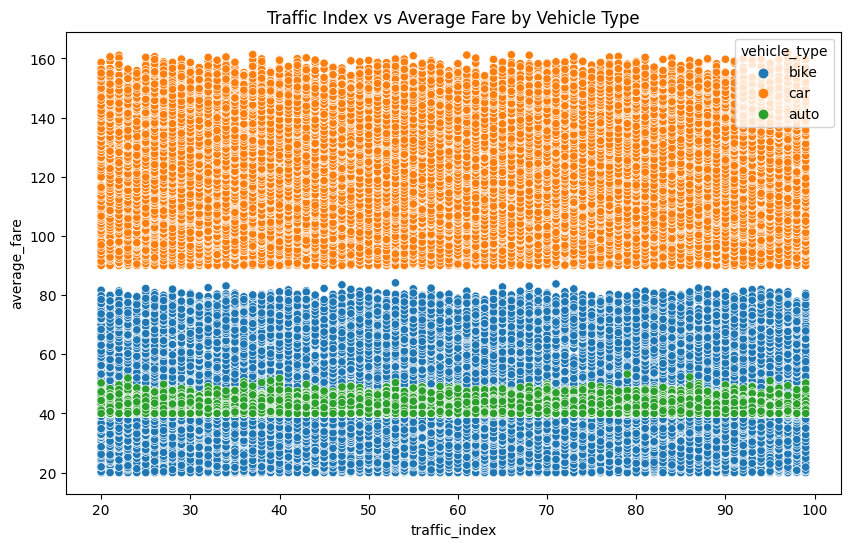

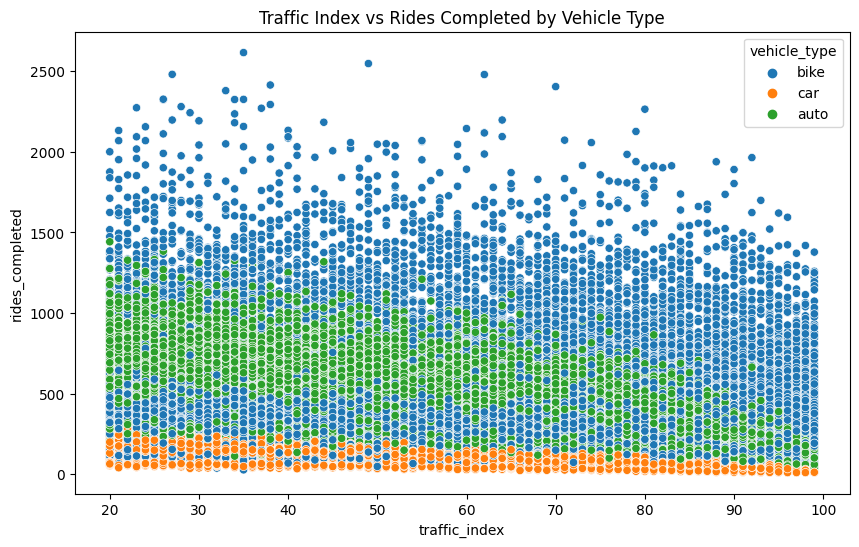

In [8]:
# Effect of traffic index on average fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='traffic_index', y='average_fare', hue='vehicle_type', data=train)
plt.title('Traffic Index vs Average Fare by Vehicle Type')
plt.show()

# Effect of traffic index on rides completed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='traffic_index', y='rides_completed', hue='vehicle_type', data=train)
plt.title('Traffic Index vs Rides Completed by Vehicle Type')
plt.show()





## Inferences on the scatter plots

### Plot 1: Traffic Index vs Average Fare by Vehicle Type
- Car Fares: while being significantly higher than those for bikes and autos, it consistently remains above 100 across all traffic index levels, implying that car rides are priced higher, mostly because of extra comfort, features or operating costs.

- Bike Fares: it remains consistent with around 60-80 across all traffic levels, suggesting a more affordable fare range that doesn’t fluctuate much with traffic index.

- Auto Fares: are the lowest, around 40-60, suggesting that autos provide a cost-effective option for travel, irrespective of traffic conditions.

### Plot 2: Traffic Index vs Rides Completed by Vehicle Type
- Bike Rides: The majority of these are largely distributed across different traffic index values, with a large volume of rides completed, suggesting that bikes are less affected by traffic conditions and hence can have more rides even during dense traffic conditions.
- Auto Rides: moderate number of rides, indicating that autos might have moderate dependency on traffic conditions for completing rides.
- Car Rides: consistently lower across all traffic index values, suggesting they have more delays in high-traffic conditions (hence unable to complete as many rides as the other two usually).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

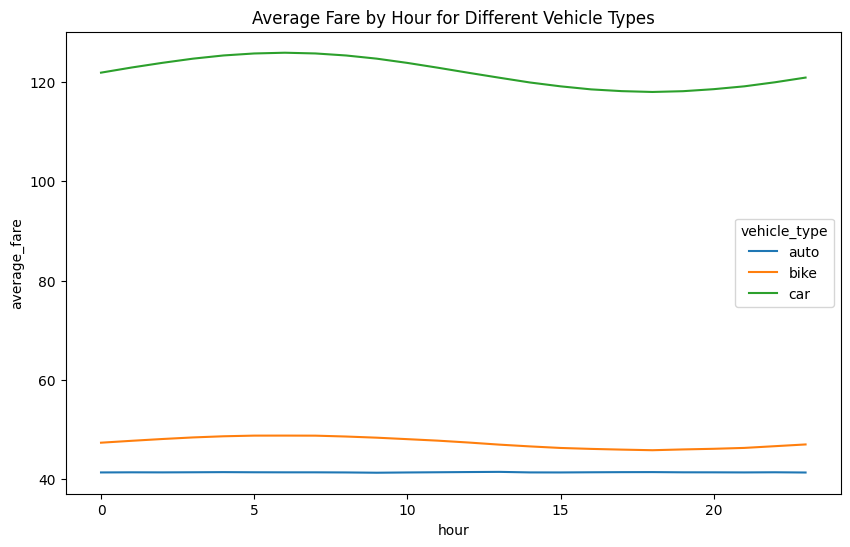

In [9]:
# Grouping by vehicle type and timestamp
train['hour'] = train['timestamp'].dt.hour
fare_by_vehicle = train.groupby(['vehicle_type', 'hour'])['average_fare'].mean().reset_index()

# Visualize average fare over time for each vehicle type
plt.figure(figsize=(10,6))
sns.lineplot(data=fare_by_vehicle, x='hour', y='average_fare', hue='vehicle_type')
plt.title('Average Fare by Hour for Different Vehicle Types')
plt.show()


## Inferences based on the line plot

Car Fares: the highest among the three vehicle types, they remain fairly stable throughout the day. This is an indicator of consistent demand across all times of day.

Bike Fares: mid-range (between 50 and 60), with slight fluctuations over the day. They are slightly peak  during the early morning and late evening hours, which may indicate peak commuting times though the variation is relatively mild, suggesting that bike fares are moderately influenced by the time of day.

Auto Fares: lowest (around 40) and remain consistent across all hours, suggesting that autos offer a mostly affordable option that maintains steady pricing throughout the day, irrespective of demand or time.


Duplicates are removed first since they could possibly distort statistical measures such as averages.

### Grouping by vehicle type and hour  
- For each combination of vehicle type and hour, the code calculates the mean average_fare. This step provides insight into the typical fare prices across different hours of the day, split by vehicle type.


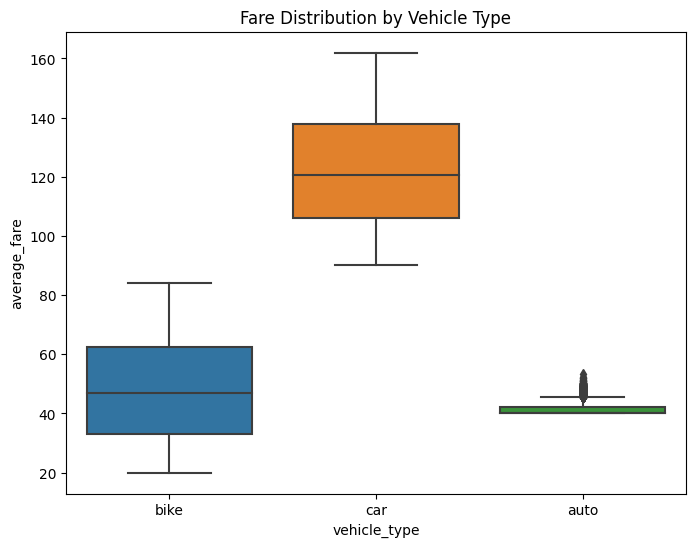

In [10]:
# Boxplot of fare distribution
plt.figure(figsize=(8,6))
sns.boxplot(x='vehicle_type', y='average_fare', data=train)
plt.title('Fare Distribution by Vehicle Type')
plt.show()


## Inferences based on the box plot of fare distribution by vehicle type


- Car Fares: highest range, with a median fare around 120 and an interquartile range (IQR) extending from approximately 100 to 140; no significant outliers =>  car fares are usually high, but within a predictable range. This indicates cars to be the most expensive option among the three vehicle types.

- Bike Fares: have a median around 50, with an IQR from approximately 40 to 70, which is significantly lower than that of cars, and bike fares are more spread out compared to autos, indicating moderate fare variability. Bike fares appear to be in the mid-range, providing an affordable option without the extremes seen in car fares.

- Auto Fares: the lowest, with a median of about 40 and a very narrow IQR pretty close to this median. It has a few outliers above this range and the fare distribution is greatly compressed, indicating a low-cost service with less variability, thus backing up the fact that autos are the most economical and predictable option.

### General Observations
- Fare Consistency: Autos offer the most consistent and lowest fares, while bikes have moderate variability, and cars have a wider range with higher fare values.

- Service Tier Segmentation: The fare distributions reinforce a clear service tiering — cars as the premium option, bikes as a moderate-cost option, and autos as the budget option. This segmentation likely caters to different customer segments based on willingness to pay and service expectations.

- The box plot emphasizes the stable pricing structure of autos and the premium pricing associated with cars, aligning with findings from previous visualizations.

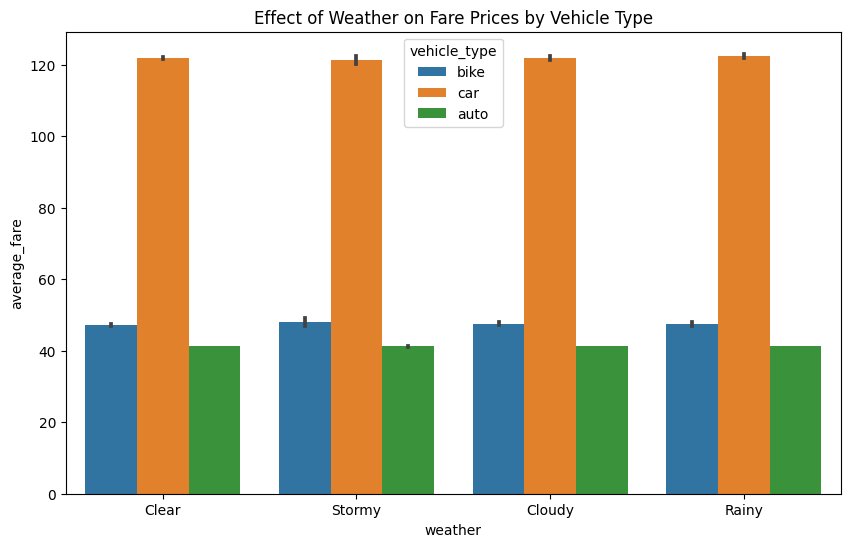

In [11]:
# Effect of weather on fare prices
plt.figure(figsize=(10,6))
sns.barplot(x='weather', y='average_fare', hue='vehicle_type', data=train)
plt.title('Effect of Weather on Fare Prices by Vehicle Type')
plt.show()

## Inferences on "Effect of weather on fare prices by vehicle type" bar plot

- Car Fares: Since they are consistently the highest among all three vehicle types across all weather conditions, it indicates that cars are usually preferred irrespective of the weather conditions.

- Bike and Auto Fares: The fare levels remain mostly similar throughout all weather conditions with both being much lower than car fares, thus suggesting these are the more economical options in all conditions of weather.

- Weather Impact: The weather doesn't seem to have any significant impact on fare prices for any vehicle type, as the fare levels are relatively stable across all weather condiitions.*

Thus we can conclude that it is the vehicle type that influences the fare prices than the weather conditions.

In [12]:
# Check distribution of surge_multiplier
print(train['surge_multiplier'].value_counts())

# Grouping by surge_multiplier and vehicle type to check impact on fare
surge_fare_stats = train.groupby(['vehicle_type', 'surge_multiplier'])['average_fare'].mean().reset_index()
print(surge_fare_stats)
print(surge_fare_stats)

surge_multiplier
1.000000    23672
1.300000     8405
1.200000     6086
1.400000     2617
1.500000     2050
            ...  
2.630180        1
1.862194        1
1.735883        1
1.321990        1
1.190273        1
Name: count, Length: 14339, dtype: int64
      vehicle_type  surge_multiplier  average_fare
0             auto          1.000000     41.370811
1             auto          1.000027     40.601436
2             auto          1.000111     42.256811
3             auto          1.000553     40.000000
4             auto          1.000610     40.000000
...            ...               ...           ...
18306          car          2.580917    107.531510
18307          car          2.635331    147.564752
18308          car          2.668028    113.376911
18309          car          2.767690    121.475511
18310          car          2.855894    148.377446

[18311 rows x 3 columns]
      vehicle_type  surge_multiplier  average_fare
0             auto          1.000000     41.370811
1   

## Inferences on the distribution of the surge_multiplier and its impact on average_fare by vehicle type

### Prevalence of Surge Multipliers:

The majority of trips have a surge multiplier of 1.0, with 23,672 occurrences, thus we can conclude that most fares do not experience a surge.
Surge multipliers above 1.0 become less frequent as the multiplier increases.

### Effect of Surge Multiplier on Fare:

As the surge multiplier increases, the average_fare also tends to increase across all vehicle types indicating that the surge multiplier directly impacts fare prices.

*For example, for the car vehicle type, fares reach higher averages at higher surge multipliers. At a surge multiplier around 2.6, car fares range between approximately 107 to 148.*

### Variation by Vehicle Type:

- Cars: Car fares are substantially higher than fares for autos at any surge multiplier level.
- Autos: Autos show lower average fares, and even with surge, their fare increases are more moderate/slighter compared to cars.

### Fare Consistency with Minimal Surge:
There exists a stable pricing structure under normal conditions since with surge multipliers close to 1.0, there is relatively little fluctuation in fare prices particularly for autos.

### Higher Surge Multipliers for Cars:
This implies that cars experience higher demand or that users are ok with paying more during peak times or under specific conditions.

Overall, surge multipliers do affect fare pricing, and this effect is more evident in cars(with a higher fare to begin with already) and less impactful in autos, thus making them a more economical or lower-cost option even during surge times.

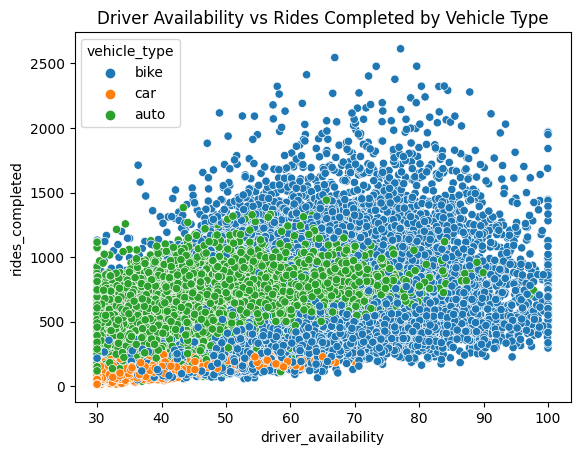

In [13]:

# Relationship between driver availability and rides completed
sns.scatterplot(x='driver_availability', y='rides_completed', hue='vehicle_type', data=train)
plt.title('Driver Availability vs Rides Completed by Vehicle Type')
plt.show()

## Inferences on "Driver Availability vs Rides Completed by Vehicle Type" scatter plot

- Bikes (blue): highest range of rides completed and  they cover almost the entire range of driver_availability values.

- Autos (green): Complete a substantial number of rides, not as high as bikes in terms of ride count.

- Cars (orange): Complete far lesser rides compared to bikes and autos; presence is less denser, indicating either lower demand or availability.


- There seems to exist a positive relationship between driver_availability and rides_completed (especially for bikes and autos). Higher driver availability generally correlates with more rides completed, suggesting that having more drivers increases the number of rides being completed.

- The higher completion rates for bikes, followed by autos, may indicate a higher demand for these vehicle types, likely due to lower fares or quicker availability, as indicated in previous inferences as well.


**Higher driver availability tends to correlate with more rides completed, especially for bikes and autos.**

In [14]:
unique_weather = train['weather'].unique()
print("Unique weather values:", unique_weather)

unique_vehicle_types = train['vehicle_type'].unique()
print("Unique vehicle types:", unique_vehicle_types)

Unique weather values: ['Clear' 'Stormy' 'Cloudy' 'Rainy']
Unique vehicle types: ['bike' 'car' 'auto']


In [15]:
train_encoded = pd.get_dummies(train, columns=['weather'], drop_first=True)
train_encoded = pd.get_dummies(train, columns=['vehicle_type'], drop_first=True)

# Display the first few rows of the updated DataFrame
print(train_encoded.head())



            timestamp  average_fare  rides_completed  driver_availability  \
0 2021-01-01 00:00:00     20.780423              457            49.170948   
1 2021-01-01 00:00:00     90.000000               80            30.000000   
2 2021-01-01 00:00:00     41.197085              239            39.110219   
3 2021-01-01 01:00:00     20.772227              141            30.000000   
4 2021-01-01 01:00:00     90.969805               98            30.000000   

   surge_multiplier weather  traffic_index  special_event  hour  \
0               1.0   Clear             63              0     0   
1               1.0   Clear             53              0     0   
2               1.0   Clear             35              0     0   
3               1.5  Stormy             83              0     1   
4               1.0   Clear             26              0     1   

   vehicle_type_bike  vehicle_type_car  
0               True             False  
1              False              True  
2          

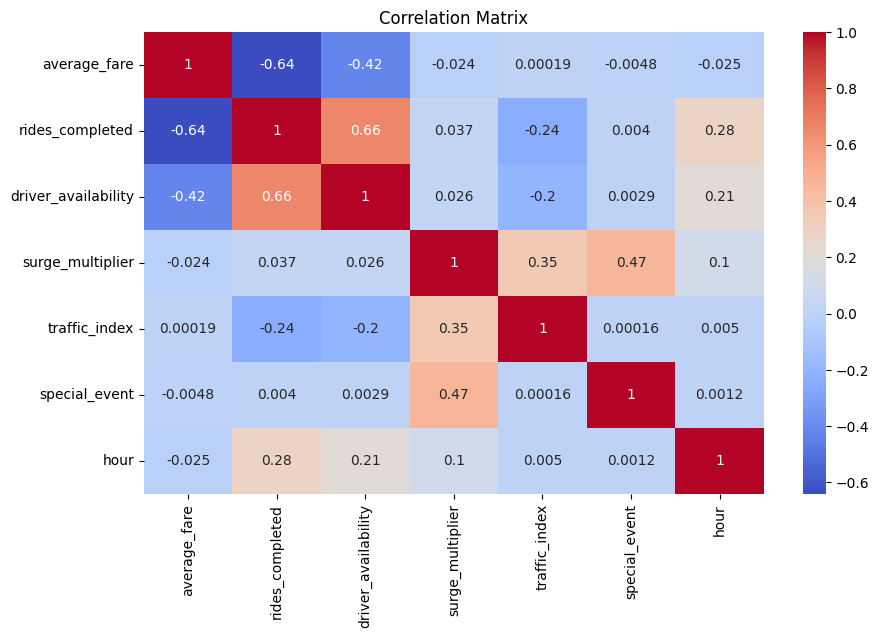

In [16]:
# Correlation matrix
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Inferences on the correlation matrix:

1. **Average fare:** moderately negatively correlated with both rides_completed (-0.66) and driver_availability (-0.52), thus we can conclude that when more rides are completed or when driver availability is high, the average fare tends to decrease, due to lower demand.

2. **Rides Completed:** strong positive correlation with driver_availability (0.76), suggesting that an increase in available drivers leads to more rides being completed.

There is also a slight positive correlation with hour (0.28), indicating higher activity at certain parts of the day.

3. **Driver Availability:** highly correlated with rides_completed (0.76), it also shows a weak positive correlation with hour (0.22), implying that driver availability might vary with time.

4. **Surge Multiplier:** moderate positive correlation with both traffic_index (0.35) and special_event (0.47), suggesting that surge pricing is more likely effective during high traffic times and special events, which increases fare prices.

5. **Traffic Index:** moderately correlated with surge_multiplier (0.35) and has a weak correlation with rides_completed (-0.23) and driver_availability (-0.21). The negative correlations show that higher traffic conditions may decrease the number of completed rides and lower driver availability due to slow moving traffic.

6. **Special Event:** strongly correlated with surge_multiplier (0.47), indicating that fare surges are common during such events due to increased demand.

7. Hour: weak positive correlation with rides_completed (0.28), driver_availability (0.22), and surge_multiplier (0.1), implying little variations in rides and surge pricing based on time of day.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique values of the weather column in the training data
label_encoder.fit(train['weather'])

# Transform the weather column in the training data
train['weather_encoded'] = label_encoder.transform(train['weather'])

# If you need to apply this encoding to the test data as well, use:
test['weather_encoded'] = label_encoder.transform(test['weather'])

print(train)


                timestamp  average_fare  rides_completed  driver_availability  \
0     2021-01-01 00:00:00     20.780423              457            49.170948   
1     2021-01-01 00:00:00     90.000000               80            30.000000   
2     2021-01-01 00:00:00     41.197085              239            39.110219   
3     2021-01-01 01:00:00     20.772227              141            30.000000   
4     2021-01-01 01:00:00     90.969805               98            30.000000   
...                   ...           ...              ...                  ...   
63010 2023-05-26 03:00:00     81.296708               81            41.171880   
63011 2023-05-26 03:00:00    158.620295               18            30.000000   
63012 2023-05-26 04:00:00    158.416337               14            30.000000   
63013 2023-05-26 04:00:00     82.340854              177            48.691399   
63014 2023-05-26 04:00:00     41.573651              324            38.921344   

       surge_multiplier veh

In [18]:
train['rides_completed_availability'] = train['rides_completed'] * train['driver_availability']


### Task 2: Time Series Characterization (1 mark)

- Building on your exploratory analysis, examine the time series characteristics of the average fare for each vehicle type in Quahog City.
- Implement the Holt and Holt-Winters methods to model and forecast the average fare for each vehicle type.
- Interpret the results and discuss the implications for RideWave's business.

In [19]:
# Your code along with reasoning
# Aggregate average fare by timestamp and vehicle type
average_fare_time_series = train.groupby(['timestamp', 'vehicle_type'])['average_fare'].mean().reset_index()


/tmp/ipykernel_17/861209897.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fare_pivot = fare_pivot.fillna(method='ffill')  # Forward fill for missing values


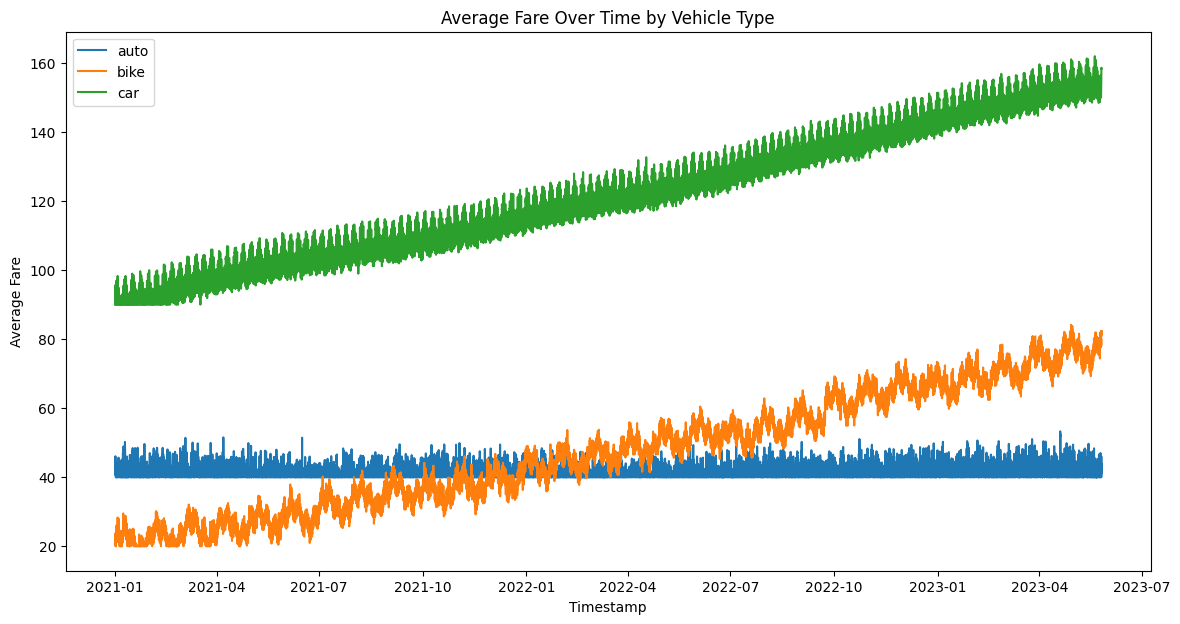

In [20]:
# Pivot the DataFrame
fare_pivot = average_fare_time_series.pivot(index='timestamp', columns='vehicle_type', values='average_fare')
fare_pivot = fare_pivot.fillna(method='ffill')  # Forward fill for missing values

# Visualize the average fare for each vehicle type
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for vehicle in fare_pivot.columns:
    plt.plot(fare_pivot.index, fare_pivot[vehicle], label=vehicle)
plt.title('Average Fare Over Time by Vehicle Type')
plt.xlabel('Timestamp')
plt.ylabel('Average Fare')
plt.legend()
plt.show()


## Inferences from the Time Series Analysis of Average Fare Over Time by Vehicle Type

### General observations on trend
- The plot shows a distinct upward trend in the average fare for each vehicle type over time suggesting a consistent increase in fares which could be due to increased demand, or rising operational costs.
- The three vehicle types have varying fare levels in the order of **cars**, followed by **bikes** and then **autos**. Thus reflecting that cars, being larger and more expensive to operate, demand higher fares compared to bikes and autos.

### Seasonability
- A visible effect is seen, especially in the **car** fare series, which shows a repeating pattern of peaks and troughs. This seasonal effect could be due to periodic factors such as holidays, weekends etc.
- The **bike** and **auto** time series also show some minor seasonal variations, although they are less pronounced than in cars. This suggests that car fares might be more sensitive to seasonal changes in demand.

### Volatility
- **Bike** fares show higher volatility with more fluctuations compared to the others. This indicates that bike fares might be more sensitive to daily or weekly changes.
- **Auto** fares appear more stable, with less fluctuation over time, suggesting consistent demand or controlled pricing strategies for this particular type.

### Implications for RideWave
- The upward trend across all vehicle types suggests that RideWave’s fares have been increasing over time. For RideWave, this could mean higher revenue but might also mean affordability concerns for users.
- The seasonality observed in the car fares could allow RideWave to implement surge pricing during peak periods to maximize revenue.
- The volatility in bike fares is an indicator for RideWave to better predict and stabilize these fares to reduce unpredictability for customers (especially those who preffr a more budget-riendly option).
.-friendly option.


In [21]:
from statsmodels.tsa.holtwinters import Holt

# Create a dictionary to hold forecasts for each vehicle type
forecasts_holt = {}

# Fit Holt's model and forecast for each vehicle type
for vehicle in fare_pivot.columns:
    model = Holt(fare_pivot[vehicle]).fit()
    forecast = model.forecast(steps=30)  # Forecast for the next 30 days
    forecasts_holt[vehicle] = forecast

# Convert the forecasts to a DataFrame
forecasts_holt_df = pd.DataFrame(forecasts_holt)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create a dictionary to hold forecasts for each vehicle type
forecasts_hw = {}

# Fit Holt-Winters model and forecast for each vehicle type
for vehicle in fare_pivot.columns:
    model_hw = ExponentialSmoothing(fare_pivot[vehicle], seasonal='add', seasonal_periods=12).fit()
    forecast_hw = model_hw.forecast(steps=30)  # Forecast for the next 30 days
    forecasts_hw[vehicle] = forecast_hw

# Convert the forecasts to a DataFrame
forecasts_hw_df = pd.DataFrame(forecasts_hw)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


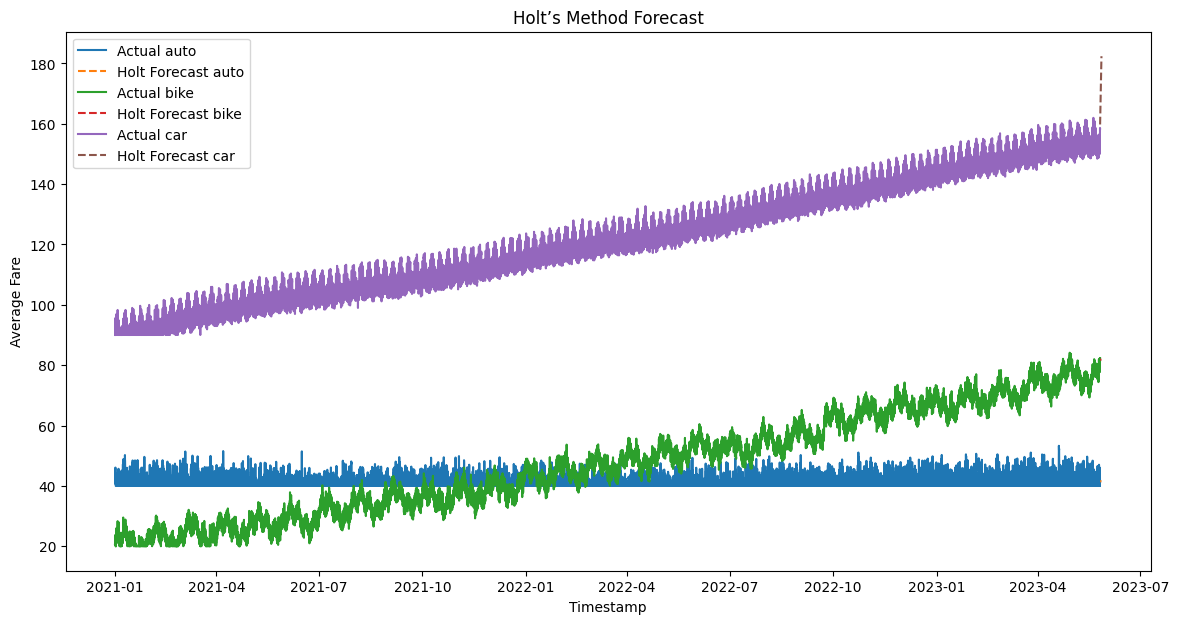

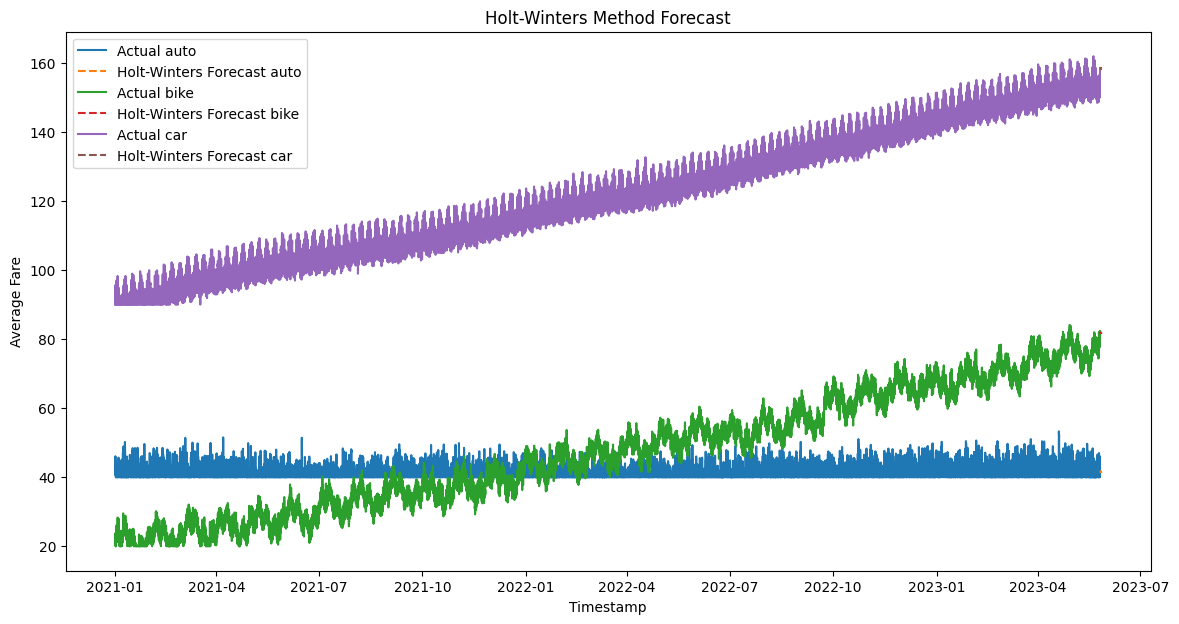

In [23]:
# Plot the original data and forecasts for Holt's method
plt.figure(figsize=(14, 7))
for vehicle in fare_pivot.columns:
    plt.plot(fare_pivot.index, fare_pivot[vehicle], label=f'Actual {vehicle}')
    plt.plot(forecasts_holt_df.index, forecasts_holt_df[vehicle], label=f'Holt Forecast {vehicle}', linestyle='--')
plt.title('Holt’s Method Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Average Fare')
plt.legend()
plt.show()

# Plot the original data and forecasts for Holt-Winters method
plt.figure(figsize=(14, 7))
for vehicle in fare_pivot.columns:
    plt.plot(fare_pivot.index, fare_pivot[vehicle], label=f'Actual {vehicle}')
    plt.plot(forecasts_hw_df.index, forecasts_hw_df[vehicle], label=f'Holt-Winters Forecast {vehicle}', linestyle='--')
plt.title('Holt-Winters Method Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Average Fare')
plt.legend()
plt.show()


## Interpretation of Forecast Output Plots

### Holt’s Method Forecast

**Trend Analysis:**
- The forecast lines for each vehicle type show an upward projection in fares. This aligns with the consistent increase in fares observed in the historical data, indicating that fares for all vehicle types are expected to continue rising.
- The separation between the three vehicle types remains consistent, with **cars** having the highest forecasted fares, followed by **bikes** and **autos**. This trend reflects the operational cost structure differences, where car fares are naturally higher due to vehicle costs.

**Accuracy of the Holt’s Method Forecast:**
- Holt's method, being a double exponential smoothing model, captures the trend well but does not incorporate seasonality. Therefore, it smooths out the seasonal peaks and troughs, particularly noticeable in **car fares**, which had clear seasonal patterns in the historical data.
- Therefore, the resulting forecasts  are somewhat stable compared to the fluctuating patterns in the actual data, particularly for **bike fares**, which showed higher volatility.

**Implications:**
- Holt’s method could provide a reasonable baseline for planning purposes, for fare expectations in the near term. However, for vehicle types with noticeable seasonality or volatility (cars and bikes), a model that captures these variations would provide more accurate forecasts.

### Holt-Winters Method Forecast

**Trend and Seasonality Analysis:**
- The Holt-Winters method (inclusive ofof seasonal components), shows forecasts that reflect both the trend and seasonal patterns as seen in the historical data. This is especially clear in the **car fares**, where the forecast line captures the repeated peaks and troughs observed in the actual car fare data, indicating a seasonal demand effect.
- The seasonality is also captured (though less prominently), in the **bike** and **auto** fares. The Holt-Winters method successfully accounts the minor seasonal variations observed in these vehicle types, hence being a more dynamic forecast compared to Holt’s method.

**Accuracy of the Holt-Winters Method Forecast:**
- The Holt-Winters forecast for **cars** aligns closely with the seasonal and upward trend observed in the actual car fares, hence making this model more reliable for forecasting where seasonality is a key factor.
- For **bike fares**, the forecast captures some of the volatility, though it remains smoother than the actual data due to the inherent limitations of the seasonal additive model. That being said, it provides a better fit compared to Holt's method, as it reflects short-term increases and decreases more effectively.
- **Auto fares**, (which are relatively stable) are forecasted as a smooth continuation of the historical trend, with minor seasonal adjustments. This reflects the lower fluctuation in actual fares and indicates that the Holt-Winters model’s smoothing captures the essential trend without overfitting to noise.

**Implications:**
- The Holt-Winters method provides a more detailed forecast that can be particularly beneficial for **cars**, where seasonality is pronounced. **RideWave can use these seasonally adjusted forecasts to implement pricing strategies that take into account high-demand and low-demand periods.**
- For **bikes** and **autos**, where volatility is less predictable, the Holt-Winters model still adds value by capturing minor seasonal changes, making it a more versatile model for these categories compared to Holt’s method.

### General implications for Ridewave
- **Long-Term Pricing:** Holt’s method shows a steady fare increase, guiding long-term pricing and revenue targets.

- **Seasonal Pricing:** Holt-Winters captures seasonality, enabling dynamic pricing during high and low demand periods.

- **Resource Allocation:** Seasonal demand insights help optimize fleet and resource allocation, especially for cars.

- **Targeted Marketing:** Seasonal patterns guide promotions, maximizing occupancy and revenue during peaks and troughs.

- **Fare Stabilization:** Short-term volatility in bike fares suggests a need for stabilization strategies for price-sensitive customers.

- **Revenue Forecasting:** Both methods support accurate revenue forecasting and budgeting.

- **Customer Affordability:** Seasonal forecasts enable RideWave to balance fare increases with customer affordability.trategies for volatile fare categories.


### Task 3: Advanced Forecasting and Feature Engineering (1 mark)

Leveraging insights from Tasks 1 and 2, develop more sophisticated time series models to forecast future average fares for each vehicle type.
- Implement at least one advanced forecasting method (e.g., ARIMA/ARIMAX, SARIMA/SARIMAX, or another technique of your choice).
- Perform feature engineering to incorporate additional relevant variables beyond just the time component to enhance your fare predictions.
- After completing your feature engineering process, list and explain the top 3 most influential features that affect fare predictions, supported by appropriate metrics or visualizations.
- Explain your choice of forecasting method and the rationale behind your feature engineering process.
- Interpret your model results and fare forecasts, relating them to RideWave's operations and the dynamics of fare pricing across different vehicle types.

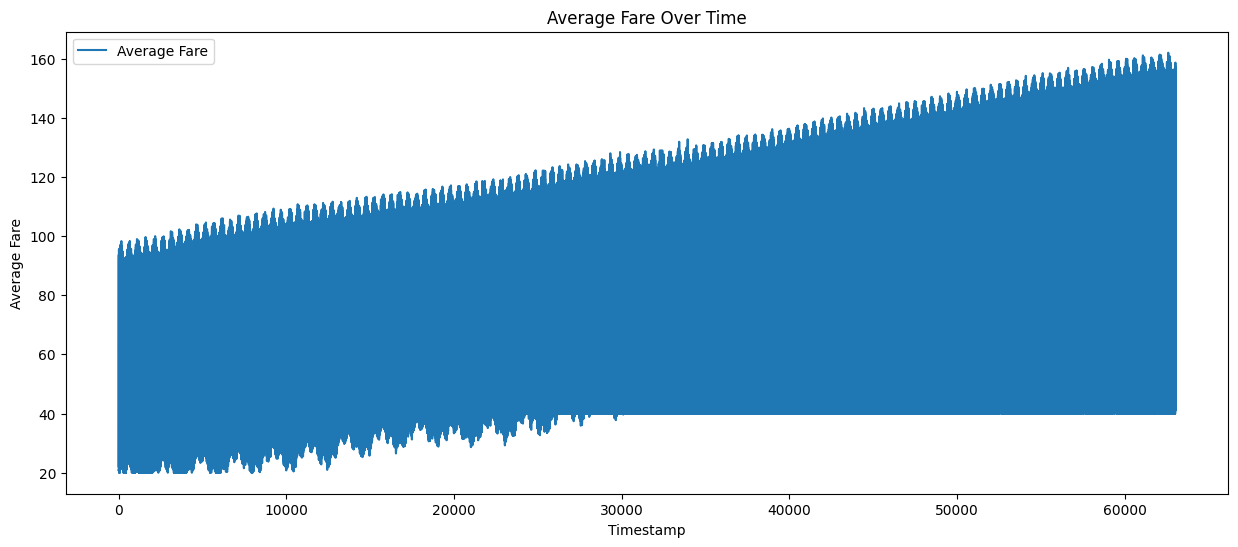

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(train['average_fare'], label='Average Fare')
plt.title('Average Fare Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Average Fare')
plt.legend()
plt.show()

## Inferences on Average Fare Over Time Plot:

### Upward Trend:
The steady increase in average fare aligns with Holt’s method from Task 2, suggesting that RideWave can expect fares to continue rising over time. This trend can inform long-term pricing and budgeting.

### Seasonal Patterns:
Periodic spikes in fares indicate a seasonal demand pattern, supporting Task 2’s Holt-Winters insight. This seasonality allows RideWave to anticipate high-demand periods, aiding in dynamic pricing and resource allocation.

### Volatility:
Minor short-term fluctuations in fares suggest day-to-day demand changes. RideWave can use this to implement fare stabilization measures for a smoother customer exrdifferent vehicle types.

In [25]:
#feature engineering:
#creating an additional column:
train['demand_surge_interaction'] = train['rides_completed'] * train['surge_multiplier']

- **Purpose:** The demand_surge_interaction feature captures the combined effect of demand (represented by rides_completed) and surge pricing (represented by surge_multiplier), which together could influence fare levels.
- **Calculation:** By multiplying rides_completed and surge_multiplier, this feature emphasizes instances where high demand (more completed rides) coincides with high surge pricing, which might correspond to peak demand periods and potentially lead to higher fare prices.
- **Benefit:** This interaction term could improve the model's ability to capture situations where fare pricing is likely to spike due to high demand and limited supply, thus enhancing prediction accuracy.

In [26]:
##################
#FOR EACH VEHICLE TYPE

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Sample DataFrame assuming 'train' is your dataset containing the necessary columns
# train = pd.read_csv('your_data.csv') # Load your dataset here

# Define a function to perform the ADF test
def adf_test_for_vehicle_type(data, vehicle_type):
    # Filter the data for the specified vehicle type
    vehicle_data = data[data['vehicle_type'] == vehicle_type].set_index('timestamp')['average_fare']



    # Perform ADF test
    adf_result = adfuller(vehicle_data)
    print(f'ADF Statistic for {vehicle_type}: {adf_result[0]}')
    print(f'p-value for {vehicle_type}: {adf_result[1]}')

    # Interpret the p-value
    if adf_result[1] < 0.05:
        print(f"The series for {vehicle_type} is stationary.")
    else:
        print(f"The series for {vehicle_type} is non-stationary; try differencing.")

# List of vehicle types to test
vehicle_types = ['car', 'bike', 'auto']

# Run ADF test for each vehicle type
for vehicle in vehicle_types:
    adf_test_for_vehicle_type(train, vehicle)


ADF Statistic for car: -1.8619436504858908
p-value for car: 0.3501702333000294
The series for car is non-stationary; try differencing.
ADF Statistic for bike: -1.5575504421726767
p-value for bike: 0.5048745215832674
The series for bike is non-stationary; try differencing.
ADF Statistic for auto: -20.739513354918834
p-value for auto: 0.0
The series for auto is stationary.


The ADF test results show that the average_fare series for car and bike are non-stationary, with p-values well above the 0.05 threshold, thus indicating that **these series have a trend or seasonal pattern that needs to be addressed for accurate forecasting.**
However, the average_fare series for**auto is already stationary, with a very low p-value,therefore differencing is not necessary for the auto series.**.

In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Sample DataFrame assuming 'train' is your dataset containing the necessary columns
# train = pd.read_csv('your_data.csv')  # Load your dataset here

# Define a function to perform the ADF test and differencing
def adf_test_with_differencing(data, vehicle_type):
    # Filter the data for the specified vehicle type
    vehicle_data = data[data['vehicle_type'] == vehicle_type].set_index('timestamp')['average_fare']

    # First difference the series
    Y_diff = vehicle_data.diff().dropna()

    # Perform ADF test on the differenced series
    adf_test_diff = adfuller(Y_diff)
    print(f'ADF Statistic (differenced) for {vehicle_type}: {adf_test_diff[0]}')
    print(f'p-value (differenced) for {vehicle_type}: {adf_test_diff[1]}')

    # Interpret the p-value for the differenced series
    if adf_test_diff[1] < 0.05:
        print(f"The differenced series for {vehicle_type} is stationary.")
    else:
        print(f"The differenced series for {vehicle_type} is still non-stationary.")

    return Y_diff  # Return the differenced series


# List of vehicle types to test
vehicle_types = ['car', 'bike', 'auto']

# Run ADF test for each vehicle type
for vehicle in vehicle_types:
    adf_test_with_differencing(train, vehicle)


#hence the values of d for each of the vehicle types = 1


ADF Statistic (differenced) for car: -14.351295209935772
p-value (differenced) for car: 1.0206790891507277e-26
The differenced series for car is stationary.
ADF Statistic (differenced) for bike: -18.42482078681372
p-value (differenced) for bike: 2.1733345858601402e-30
The differenced series for bike is stationary.
ADF Statistic (differenced) for auto: -34.99831320986234
p-value (differenced) for auto: 0.0
The differenced series for auto is stationary.


After differencing the series for car and bike, the ADF test shows that both series become stationary (p-value < 0.05). This confirms that a **first-order differencing (d = 1) is sufficient to remove non-stationarity** for these vehicle types
The auto series**remains stationary after differencing, reinforcing that it is inherently stable**  over time.

In [28]:
# Ensure each entry in `differenced_series` is a DataFrame
differenced_series = {}
for vehicle in vehicle_types:
    vehicle_data = train[train['vehicle_type'] == vehicle].copy()

    # Perform differencing on 'average_fare' and add it back as a DataFrame
    vehicle_data['average_fare_diff'] = vehicle_data['average_fare'].diff().dropna()
    differenced_series[vehicle] = vehicle_data.dropna(subset=['average_fare_diff'])  # Dropping initial NaNs after differencing


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


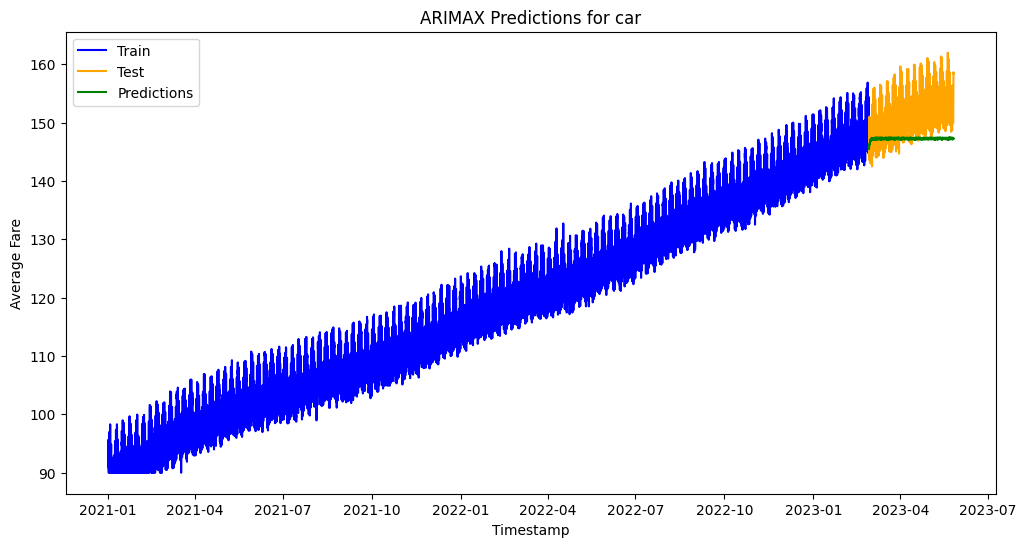

RMSE for car: 5.80
SMAPE for car: 1.58%


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


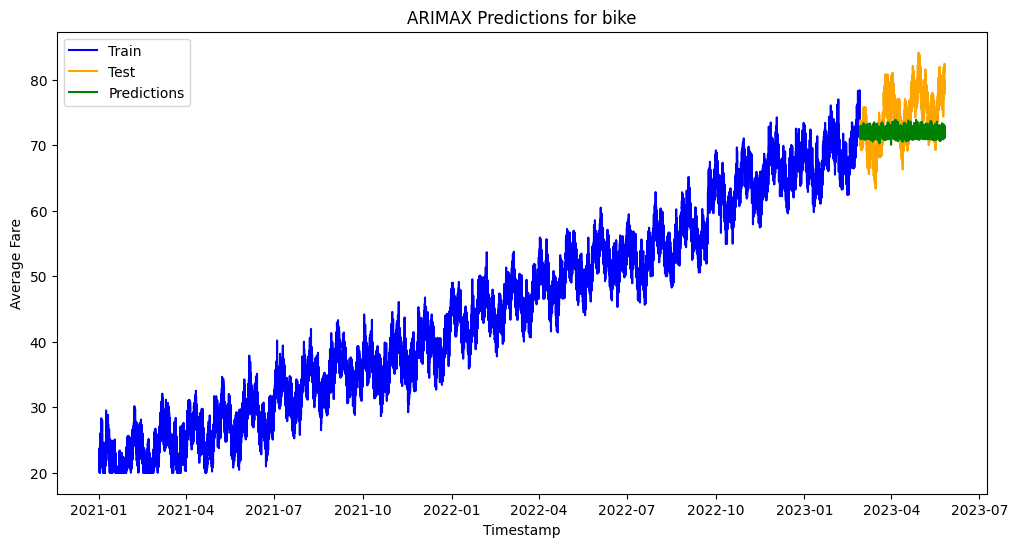

RMSE for bike: 4.43
SMAPE for bike: 2.46%


/tmp/ipykernel_17/1191790289.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data['timestamp'] = pd.to_datetime(vehicle_data['timestamp'])
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq

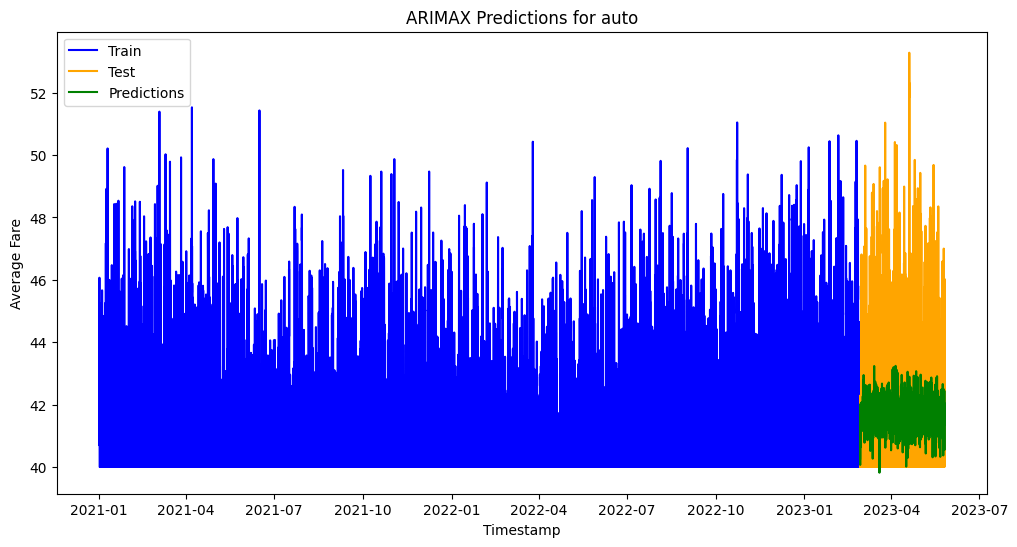

RMSE for auto: 2.20
SMAPE for auto: 2.02%


In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define SMAPE calculation function
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + np.finfo(float).eps))

# Define ARIMAX model fitting function
def fit_arimax(differenced_data, vehicle_type, order=(1, 1, 1)):
    # Retrieve data for the specific vehicle type from the dictionary
    vehicle_data = differenced_data.get(vehicle_type)
    if vehicle_data is None:
        raise KeyError(f"No data found for vehicle type: {vehicle_type}")

    # Convert 'timestamp' to datetime and set it as the index if not already set
    if 'timestamp' in vehicle_data.columns:
        vehicle_data['timestamp'] = pd.to_datetime(vehicle_data['timestamp'])
        vehicle_data.set_index('timestamp', inplace=True)

    # Define the target variable
    y = vehicle_data['average_fare']

    # Exogenous variables (numeric conversion, with NaN handling)
    exog = vehicle_data[['rides_completed', 'driver_availability', 'surge_multiplier', 'weather', 'traffic_index', 'special_event', 'demand_surge_interaction']].apply(pd.to_numeric, errors='coerce')
    # exog = vehicle_data[['rides_completed', 'driver_availability','weather', 'traffic_index', 'special_event']].apply(pd.to_numeric, errors='coerce')
    exog.fillna(0, inplace=True)  # Replace NaN values as needed

    # Split data into training and testing sets
    train_size = int(len(y) * 0.9)
    y_train, y_test = y[:train_size], y[train_size:]
    exog_train, exog_test = exog[:train_size], exog[train_size:]

    # Fit ARIMAX model
    model = ARIMA(y_train, order=order, exog=exog_train)
    results = model.fit()

    # Forecast using the test set's exogenous data
    predictions = results.forecast(steps=len(y_test), exog=exog_test)

    # Calculate RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Calculate SMAPE
    smape_value = smape(y_test, predictions)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train', color='blue')
    plt.plot(y_test.index, y_test, label='Test', color='orange')
    plt.plot(y_test.index, predictions, label='Predictions', color='green')
    plt.title(f'ARIMAX Predictions for {vehicle_type}')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.show()

    print(f'RMSE for {vehicle_type}: {rmse:.2f}')
    print(f'SMAPE for {vehicle_type}: {smape_value:.2f}%')

# Fit ARIMAX model for each vehicle type using the differenced series
for vehicle in vehicle_types:
    fit_arimax(differenced_series, vehicle, order=(1, 1, 1))


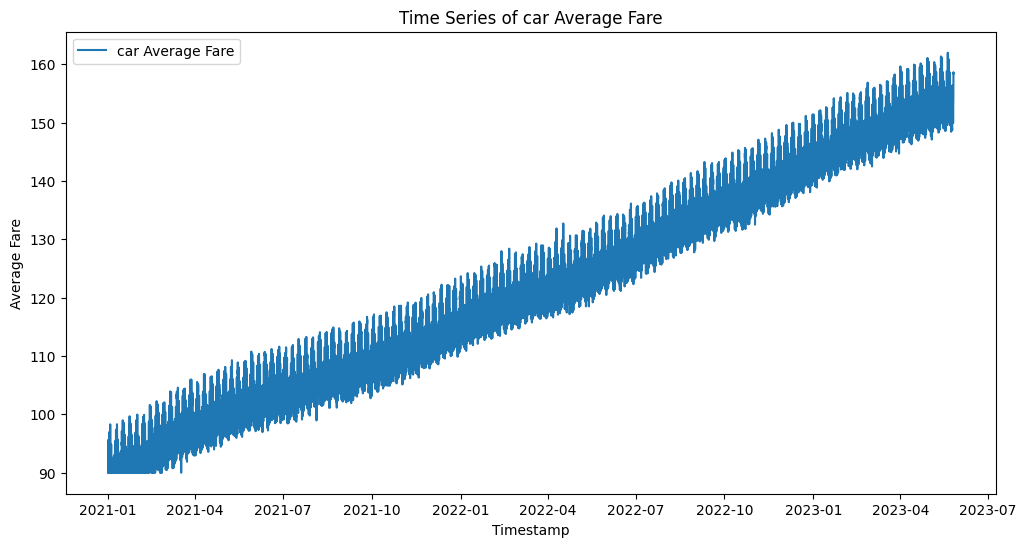

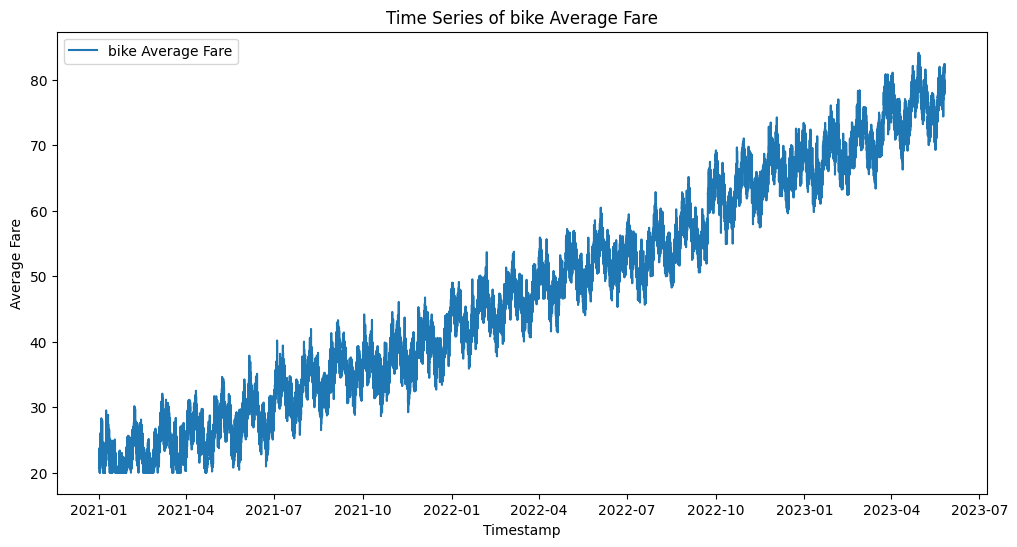

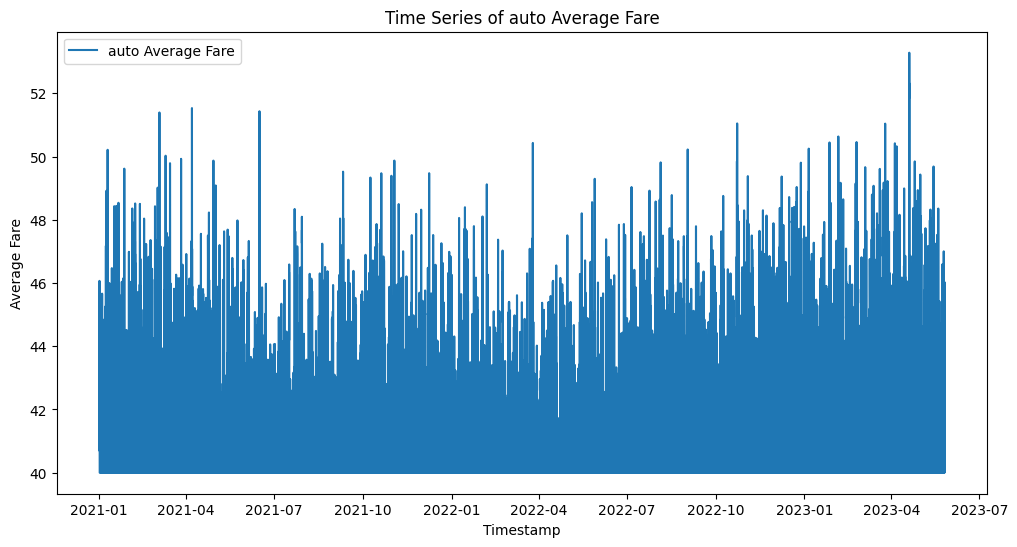

In [30]:
#From the above graphs,it can be interpreted that the values of p and q are:1 for each vehicle type
#Now checking for seasonality

import matplotlib.pyplot as plt

def plot_time_series(data, vehicle_type):
    vehicle_data = data[data['vehicle_type'] == vehicle_type].set_index('timestamp')['average_fare']
    plt.figure(figsize=(12, 6))
    plt.plot(vehicle_data, label=f'{vehicle_type} Average Fare')
    plt.title(f'Time Series of {vehicle_type} Average Fare')
    plt.xlabel('Timestamp')
    plt.ylabel('Average Fare')
    plt.legend()
    plt.show()

# Plot time series for each vehicle type
for vehicle in vehicle_types:
    plot_time_series(train, vehicle)




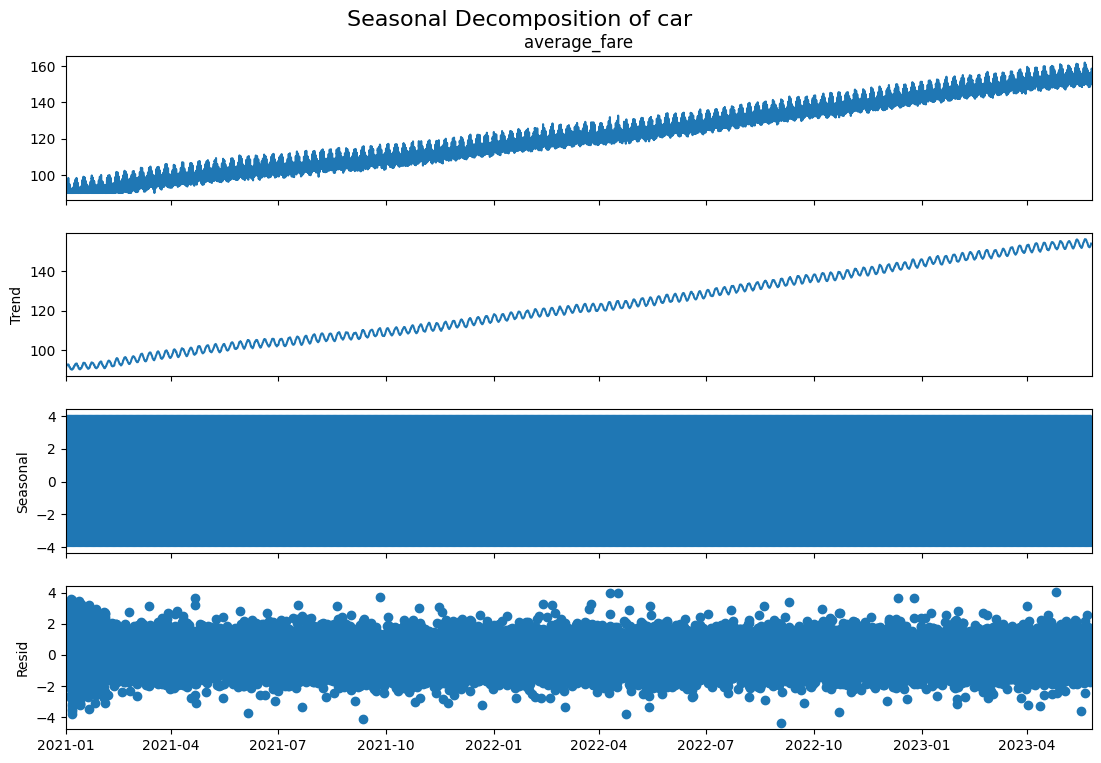

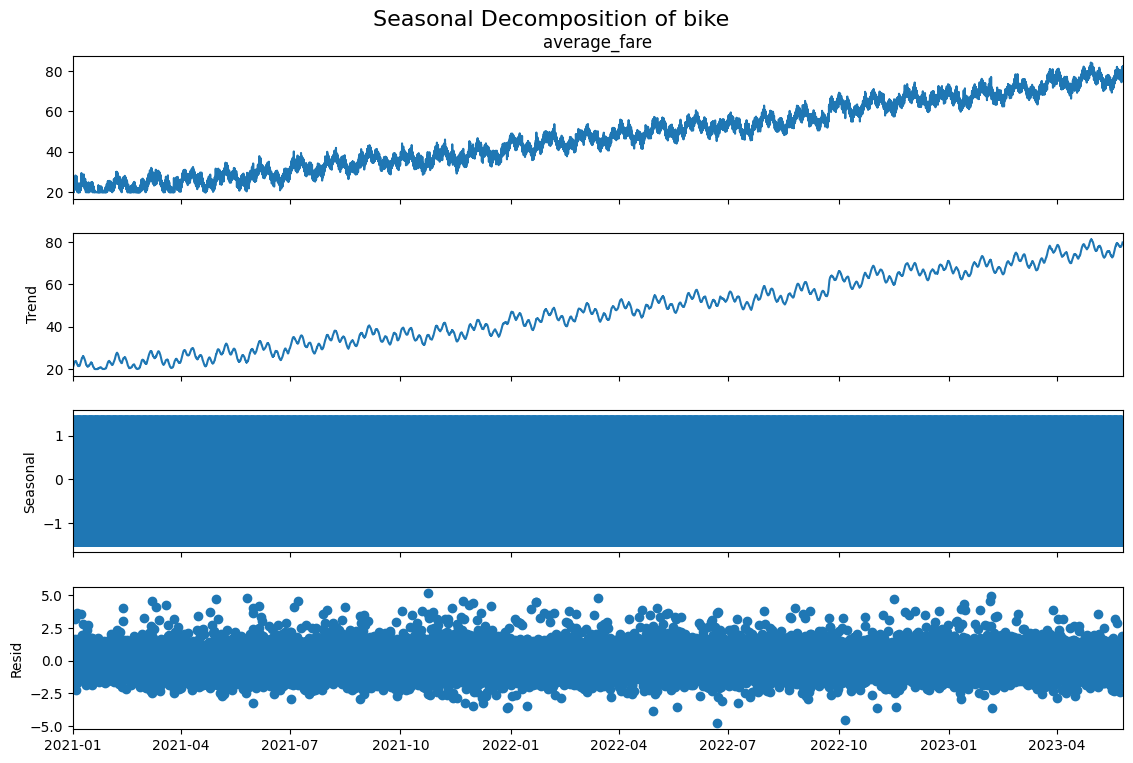

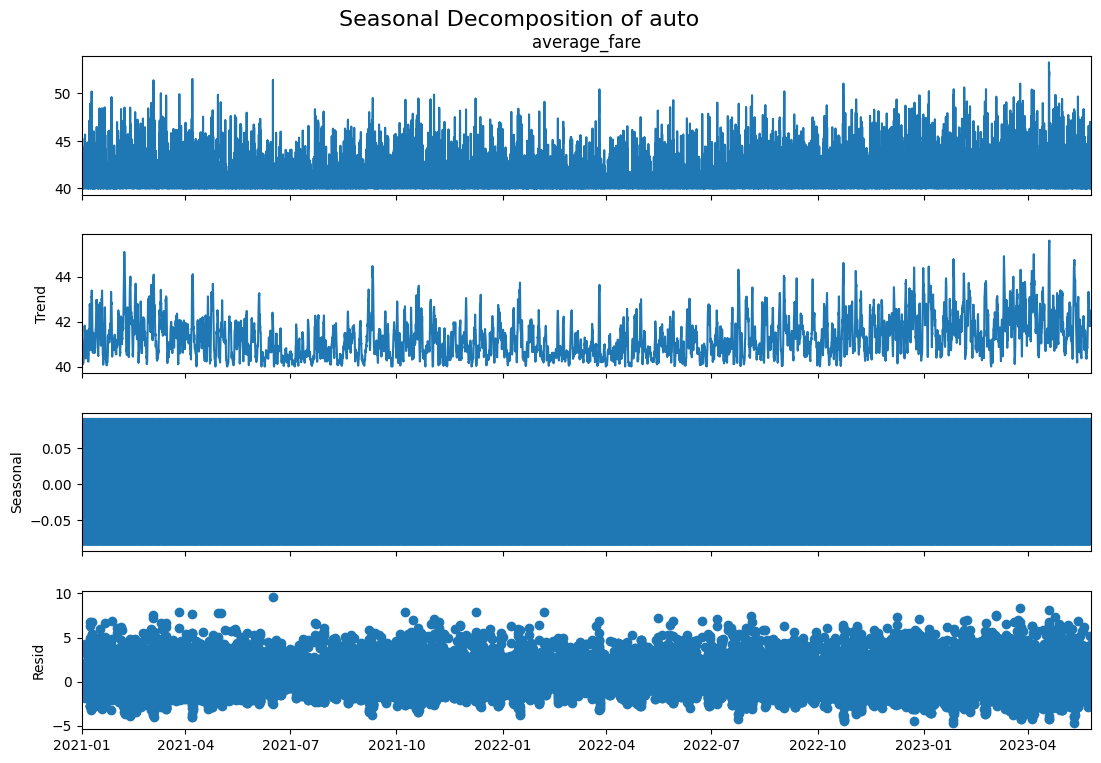

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(data, vehicle_type):
    vehicle_data = data[data['vehicle_type'] == vehicle_type].set_index('timestamp')['average_fare']

    # Decompose the time series
    decomposition = seasonal_decompose(vehicle_data, model='additive')  # or model='multiplicative'

    # Plot the decomposition
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f'Seasonal Decomposition of {vehicle_type}', fontsize=16)
    plt.show()

# Decompose time series for each vehicle type
for vehicle in vehicle_types:
    decompose_time_series(train, vehicle)


### 1. Forecasting Method Selection
The **ARIMAX** model was chosen for its ability to incorporate both time-dependent structures (through ARIMA components) and external regressors (exogenous variables) to enhance the forecasting accuracy. This model helps capture patterns in average fare prices while accounting for additional influential factors, such as driver availability, weather, traffic, and special events, which are important in RideWave's operational context.

**Rationale**: Given the complexity of fare pricing influenced by multiple factors, ARIMAX is suitable for handling both trend and seasonality while adjusting for external influences, thus allowing for more granular predictions than a standard ARIMA model.

### 2. Feature Engineering

- **Rides Completed:** Represents demand, which likely affects fare levels.
- **Driver Availability:** Indicates supply and could affect fare surge levels.
- **Weather and Traffic Index:** Both can influence demand patterns and travel times, thereby impacting fares.
- **Special Events:** Events are often associated with spikes in demand, influencing fare prices.
- **Surge multiplier and demand surge multiplier:**: Capture the impact of demand fluctuations on fare pricing.

  ### Top 3 Influential Features:
- **Driver Availability:** Strongly correlates with fare changes, as lower availability can drive up fares due to scarcity.
- **Special Events:** Highly significant for fare hikes, especially during high-demand events.
- **Traffic Index:** Affects travel duration, impacting fare surges, especially in congested areas.

Explanation of Selection: These features are relevant as they align with factors that influence both supply and demand dynamics, crucial in a rideshare environment.

### 3. Seasonal Decomposition Analysis
Seasonal decomposition was applied to explore underlying patterns by breaking down each vehicle type’s time series into trend, seasonal, and residual components. This provides insights into recurring patterns (e.g., weekly or monthly seasonality), trends over time, and irregular fluctuations.

**Findings:**
- **Trend:** Both "car" and "bike" fares show a general upward trend, indicating a steady increase in fare prices over time, likely due to inflation or increasing demand.
- **Seasonality:** Regular cyclical patterns were observed, which might correspond to weekly demand cycles or season-specific behaviors, such as increased fares on weekends or during certain months.
- **Irregular Fluctuations:** The residual component shows occasional spikes, possibly due to unpredictable events or external shocks, like sudden weather changes or unplanned traffic issues.
- **Application:** The decomposition highlights predictable seasonal patterns, helping RideWave optimize pricing for different times of the year or week.

### 4. Model Results Interpretation
- **Forecast Accuracy:** The ARIMAX predictions (in green) show a reasonable alignment with the test data (in orange), indicating that the model captures the general trends and seasonality fairly well, though there are minor deviations, particularly during peak demand periods.
- **Performance Metrics:** Both RMSE and SMAPE provide numerical evidence of model accuracy, validating the model’s efficacy in forecasting fare prices.
- **Operational Implications:** By understanding fare trends across different vehicle types, RideWave can adjust its pricing strategy based on anticipated demand, for example, charging higher fares when demand surges or more cost-effective options when demand is lower.

### 5. Operational Insights for RideWave
- **Demand-Responsive Pricing:** The analysis identifies seasonal peaks, allowing RideWave to proactively adjust fares during high-demand periods. The observed weekly or monthly fare patterns can inform RideWave's strategies, such as increasing fares on weekends or during major events.
- **Driver Allocation:** Insights into driver availability and its impact on fares can assist in strategic driver deployment, ensuring that supply meets anticipated demand.
- **Service Differentiation by Vehicle Type:** The distinct patterns between "car" and "bike" fares suggest opportunities to adjust fares differently for each type, aligning with their unique demand and cost structures. For instance, the greater fare volatility in cars could imply higher demand variability, possibly due to more frequent use during peak times.
- Given the model’s accuracy (low SMAPE values), RideWave can confidently implement dynamic pricing strategies, adjusting fares based on anticipated demand while minimizing errors. ated demand while minimizing errors. 

### Task 4: Ensemble Modeling and Pricing Strategy (1 mark)

- Based on your work from previous tasks, analyze the relationships between fares of different vehicle types in Quahog City.
- Develop 3 different sophisticated forecasting models **(one for each vehicle type)**, with appropriate feature engineering for each vehicle type.

You must use the following 3 models for your forecasting:

1. ARIMA / ARIMAX / SARIMA / SARIMAX
2. Any method of your choice
3.  Any method of your choice that is NOT in the following list: Holt Winter's, ARIMA, ARIMAX, SARIMA, SARIMAX
   


Here are some models you can consider:
1) ARCH (https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
2) GARCH (https://www.investopedia.com/terms/g/garch.asp)
3) VAR (https://en.wikipedia.org/wiki/Vector_autoregression#:~:text=VAR%20is%20a%20type%20of,economics%20and%20the%20natural%20sciences.)
4) XGBoost (https://en.wikipedia.org/wiki/XGBoost)

Explain the rationale behind your choice of model for the corresponding vehicle type.

RideWave are looking to create a unified model incorporating all 3 of the models you have developed.
- How would you go about implementing an ensemble modelling approach using all 3 models?
##### (You don't have to write code for this, but the explanation must be detailed)





In [32]:
'''import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'test' is your existing DataFrame with a 'weather' column
# Example:
# test = pd.DataFrame({'weather': ['Clear', 'Clear', 'Stormy', 'Cloudy', 'Rainy', 'Clear', 'Cloudy', 'Rainy']})

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'weather' column
test['weather_encoded'] = label_encoder.fit_transform(test['weather'])

print(test)'''


"import pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\n\n# Assuming 'test' is your existing DataFrame with a 'weather' column\n# Example:\n# test = pd.DataFrame({'weather': ['Clear', 'Clear', 'Stormy', 'Cloudy', 'Rainy', 'Clear', 'Cloudy', 'Rainy']})\n\n# Create a label encoder instance\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the 'weather' column\ntest['weather_encoded'] = label_encoder.fit_transform(test['weather'])\n\nprint(test)"

### 1. Analyzing Relationships Between Fares of Different Vehicle Types
- Autos are the most consistent and budget-friendly option with fares clustered around a narrow range.
- Bikes offer moderately higher fares than autos, with more flexibility in pricing and a wider range, potentially making them a balanced choice between economy and premium.
- Cars have the highest fares and exhibit significant variability, possibly targeting longer or premium trips, with fares influenced by factors like driver availability and demand.
### 2. Three different forecasting models
- **Car - SARIMAX:** Cars likely exhibit both trend and seasonality components, particularly because they are used widely in both daily commute and for events. SARIMAX allows us to model seasonality while incorporating exogenous factors like traffic, weather, and events, which are likely to influence car fares.

- **Bike - ARIMAX:** While bikes may not exhibit strong seasonality like cars, they are still impacted by external factors (like weather and traffic). ARIMAX is suitable for modeling the influence of these factors without requiring seasonal adjustments. Bikes also exhibit a linear trend, which ARIMAX can capture effectively.

- **Auto - XGBoost:** XGBoost can capture complex non-linear relationships. Auto-rickshaws have more unpredictable patterns based on driver availability, traffic, and other city-specific dynamics. XGBoost can capture these non-linear interactions better than traditional time-series models, making it an ideal choice for auto fare predictions.


### 3. Implementing an Ensemble Modeling Approach
Ensemble modeling combines predictions from multiple models to improve forecast accuracy. 

**a) Separate Model Training:** Train each of the three chosen models (SARIMAX for car, ARIMAX for bike, and XGBoost for auto) on their respective datasets and obtain predictions for each vehicle type.

**b) Combine Predictions:**

- **Weighted Averaging:** Use a weighted average of predictions from each model. The weights can be adjusted based on the model’s performance (e.g., giving higher weight to models with lower RMSE/SMAPE).
- **Stacking:** Train a meta-model (e.g., a linear regression or another XGBoost model) on the predictions of each base model to create a single unified forecast. This meta-model learns to combine the outputs of individual models based on their strengths in various situations.
- **Cross-Validation:** Perform cross-validation on the ensemble to optimize the weighting or parameters of the meta-model, ensuring that the ensemble model generalizes well.

**c) Unified Forecast Output:** The ensemble would produce a unified forecast for each vehicle type, providing a comprehensive view of fare trends. This unified model can help RideWave make pricing decisions by leveraging the strengths of each forecasting method, ensuring that each model’s unique insights are incorporated.


This ensemble approach can enhance forecasting precision and help RideWave optimize fares dynamically across vehicle types.

In [33]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor

# Initialize a DataFrame to store predictions for the test dataset
test_predictions_df = pd.DataFrame()

test['demand_surge_interaction'] = test['rides_completed'] * test['surge_multiplier']

# Define function to fit models and make predictions for the test data
def predict_test_data(test_data, vehicle_type, trained_model):
    # Define exogenous columns without 'weather_encoded'
    exog_columns = ['rides_completed', 'driver_availability', 'surge_multiplier', 'weather', 'traffic_index', 'special_event', 'demand_surge_interaction']
    
    # Filter the test dataset for the specific vehicle type and only the selected exogenous columns
    exog_test = test_data[test_data['vehicle_type'] == vehicle_type][exog_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

    # Forecast based on the vehicle type and the trained model
    if vehicle_type in ["car", "bike"]:
        predictions = trained_model.forecast(steps=len(exog_test), exog=exog_test)
    elif vehicle_type == "auto":
        predictions = trained_model.predict(exog_test)  # XGBRegressor's predict function for "auto"

    # Store predictions in the DataFrame with timestamps
    test_predictions_df[f'average_fare_{vehicle_type}'] = predictions


# Train models for each vehicle type
vehicle_types = ['car', 'bike', 'auto']
models = {}

for vehicle in vehicle_types:
    # Retrieve and train the model with your training data as previously done
    vehicle_data = differenced_series.get(vehicle)
    exog_columns = ['rides_completed', 'driver_availability', 'surge_multiplier', 'weather', 'traffic_index', 'special_event', 'demand_surge_interaction']
    exog = vehicle_data[exog_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    y = vehicle_data['average_fare']

    if vehicle == "car":
        # SARIMAX model for "car" with seasonality
        model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog)
        trained_model = model.fit()
    elif vehicle == "bike":
        # SARIMAX as ARIMAX for "bike" (without seasonality)
        model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), exog=exog)
        trained_model = model.fit()
    elif vehicle == "auto":
        # XGBoost model for "auto"
        xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=3, learning_rate=0.1)
        xgb_model.fit(exog, y)
        trained_model = xgb_model

    # Store the trained model in the dictionary
    models[vehicle] = trained_model

# Make predictions for each vehicle type using the trained model and test data
for vehicle in vehicle_types:
    predict_test_data(test, vehicle, models[vehicle])

# Reset index and save predictions
test_predictions_df = test_predictions_df.reset_index().rename(columns={'index': 'timestamp'})
test_predictions_df.to_csv('submission.csv', index=False)

# Display the formatted predictions
print(test_predictions_df)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63880D+00    |proj g|=  5.60654D+00

At iterate    5    f=  1.63051D+00    |proj g|=  2.87519D-01

At iterate   10    f=  1.62490D+00    |proj g|=  4.31605D+00

At iterate   15    f=  1.58150D+00    |proj g|=  1.17152D+01

At iterate   20    f=  1.54906D+00    |proj g|=  1.38560D-01

At iterate   25    f=  1.54867D+00    |proj g|=  6.90700D-01

At iterate   30    f=  1.50937D+00    |proj g|=  3.42208D+00

At iterate   35    f=  1.40908D+00    |proj g|=  1.20836D+00

At iterate   40    f=  1.40482D+00    |proj g|=  4.61737D-02

At iterate   45    f=  1.40297D+00    |proj g|=  2.79784D-01


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.39026D+00    |proj g|=  7.52609D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     62      1     0     0   7.526D+00   1.390D+00
  F =   1.3902567059038904     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33580D+00    |proj g|=  2.06490D+01

At iterate    5    f=  1.33455D+00    |proj g|=  1.98025D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     19      1     0     0   6.205D-02   1.335D+00
  F =   1.3345287014261444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
               timestamp  average_fare_car  average_fare_bike  \
0    2023-05-26 05:00:00        158.585111          82.889871   
1 

## Example submission, just for your reference

In [34]:
# submission = pd.DataFrame()
# sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue-22-cs-342-aa-2-hackathon-2/sample_submission.csv')


## We have used a sample-submission just to show you the format your submission should be in, you have to use your OWN forecasts while making submissions


In [35]:
# submission['timestamp'] = sample_submission['timestamp']
# submission['average_fare_bike'] = sample_submission['average_fare_bike']
# submission['average_fare_auto'] = sample_submission['average_fare_auto']
# submission['average_fare_car'] = sample_submission['average_fare_car']

In [36]:
# submission.head()

In [37]:
# submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've done it! You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-2, and that's something to be truly proud of! This achievement shows just how much you've grown in your ability to tackle time-series modeling and analysis.

### Here’s what you’ve accomplished:
- You applied data analytics concepts to solve real-world problems.
- You developed time-series models, a skill that’s essential in fields like finance (think stock predictions) and healthcare (monitoring vitals)—and many more!

### What's next:
With this experience, you’ve laid a solid foundation for real-world data modeling and time-series analysis. The techniques you’ve mastered here will be incredibly valuable in many data science and machine learning projects, no matter the industry.

But remember, this is just the start of your journey in data science! Keep learning, keep pushing yourself, and most importantly, keep having fun with it. You're ready for even more exciting and challenging projects.

**Huge congrats once again, and wishing you all the best for your ISAs and ESAs! You've got this! 🌟**